<a href="https://colab.research.google.com/github/SouravUpadhyay7/Hands_On/blob/main/Practical_Implementation_of_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_csv('winequalityN.csv')
dataframe.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
X = dataframe.drop(columns='quality', axis=1)
y = dataframe['quality']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify the categorical column
categorical_features = ['type']

# Create a column transformer to apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

# Apply the transformation to X_train and X_test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Fit the model with the transformed data
model.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = model.predict(X_test_transformed)

[Text(0.45769485904706597, 0.98, 'x[12] <= 10.117\ngini = 0.673\nsamples = 4872\nvalue = [23, 167, 1599, 2119, 814, 146, 4]'),
 Text(0.20664716020086155, 0.94, 'x[3] <= 0.287\ngini = 0.589\nsamples = 2235\nvalue = [10, 91, 1159, 828, 126, 21, 0]'),
 Text(0.33217100962396373, 0.96, 'True  '),
 Text(0.0978511320376678, 0.9, 'x[3] <= 0.237\ngini = 0.624\nsamples = 1014\nvalue = [6, 23, 362, 492, 111, 20, 0]'),
 Text(0.03860699258665598, 0.86, 'x[12] <= 9.15\ngini = 0.634\nsamples = 568\nvalue = [4, 9, 155, 293, 87, 20, 0]'),
 Text(0.014751552795031056, 0.82, 'x[2] <= 6.75\ngini = 0.711\nsamples = 184\nvalue = [1, 2, 43, 73, 48, 17, 0]'),
 Text(0.007212983370066119, 0.78, 'x[10] <= 3.245\ngini = 0.513\nsamples = 63\nvalue = [1, 0, 22, 38, 2, 0, 0]'),
 Text(0.004007212983370066, 0.74, 'x[5] <= 12.05\ngini = 0.363\nsamples = 42\nvalue = [0, 0, 10, 32, 0, 0, 0]'),
 Text(0.0024043277900220395, 0.7, 'x[5] <= 8.7\ngini = 0.459\nsamples = 14\nvalue = [0, 0, 9, 5, 0, 0, 0]'),
 Text(0.0016028851933

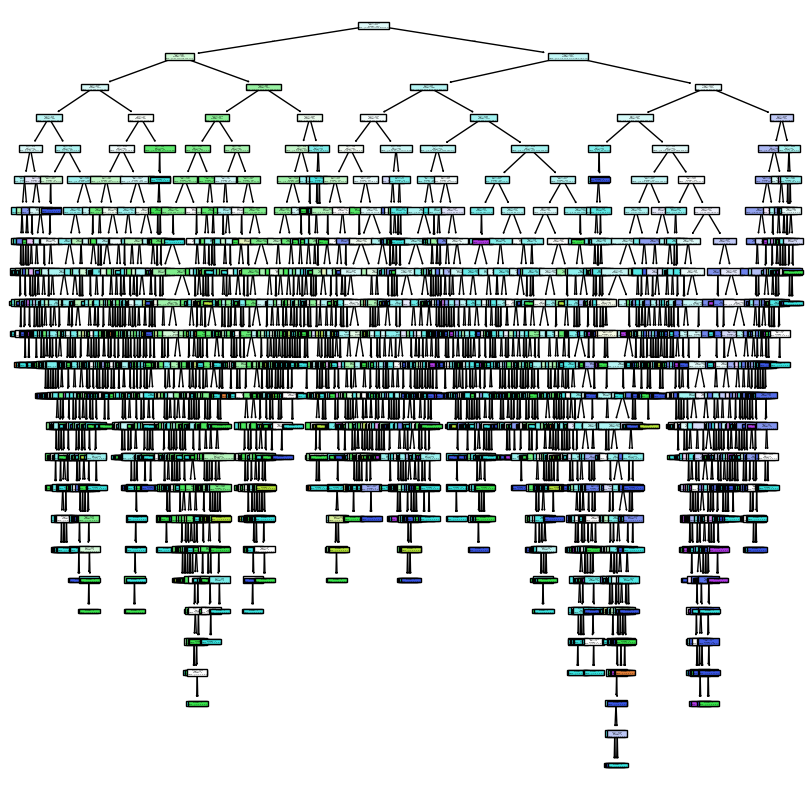

In [13]:
from sklearn import tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True)

[Text(0.5904605263157895, 0.9583333333333334, 'x[12] <= 10.483\ngini = 0.684\nsamples = 100\nvalue = [2, 37, 36, 22, 3]'),
 Text(0.3519736842105263, 0.875, 'x[5] <= 10.65\ngini = 0.592\nsamples = 57\nvalue = [2, 31, 18, 6, 0]'),
 Text(0.4712171052631579, 0.9166666666666667, 'True  '),
 Text(0.14473684210526316, 0.7916666666666666, 'x[12] <= 9.05\ngini = 0.38\nsamples = 33\nvalue = [1, 25, 7, 0, 0]'),
 Text(0.05263157894736842, 0.7083333333333334, 'x[5] <= 8.45\ngini = 0.625\nsamples = 4\nvalue = [1, 1, 2, 0, 0]'),
 Text(0.02631578947368421, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(0.07894736842105263, 0.625, 'x[5] <= 9.65\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0]'),
 Text(0.05263157894736842, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.10526315789473684, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.23684210526315788, 0.7083333333333334, 'x[3] <= 0.195\ngini = 0.285\nsamples = 29\nv

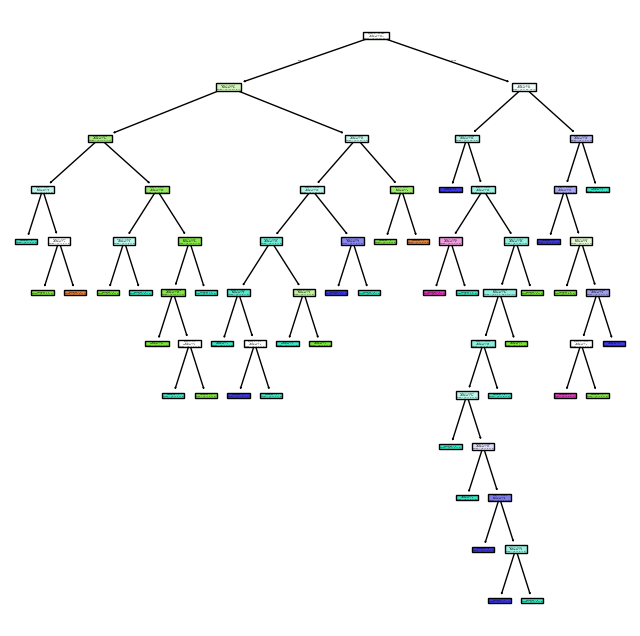

In [16]:
# Take a sample of the main dataframe for plotting the decision tree
sampleData = dataframe.sample(n=100, random_state=42)

X_sample = sampleData.drop(columns='quality', axis=1)
y_sample = sampleData['quality']

# Apply the preprocessor to X_sample
X_sample_transformed = preprocessor.transform(X_sample)

sampleModel = DecisionTreeClassifier()
sampleModel.fit(X_sample_transformed, y_sample)

from sklearn import tree
plt.figure(figsize=(8, 8))
tree.plot_tree(sampleModel, filled=True)